In [3]:
from datasets import load_dataset
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df.job_posted_date = pd.to_datetime(df.job_posted_date)

c:\Users\loren\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_us = df[df['job_country'] == 'United States'].copy()
df_us['job_posted_month'] = df_us['job_posted_date'].dt.strftime('%B')
df_us_pivot = df_us.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_us_pivot = df_us_pivot.reset_index()
df_us_pivot['month_number'] = pd.to_datetime(df_us_pivot['job_posted_month'], format='%B').dt.month
df_us_pivot = df_us_pivot.sort_values('month_number')
df_us_pivot = df_us_pivot.set_index('job_posted_month') 
df_us_pivot = df_us_pivot.drop(columns=['month_number'])
df_us_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [3]:
pd.read_csv("https://lukeb.co/software_csv") # different index compared to the pivot of the previous dataset

,job_posted_month,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
0,January,13619,9827,5108,4348
1,February,11456,9116,7298,4284
2,March,11102,8178,5814,4159
3,April,14037,9209,7232,4220
4,May,12126,8864,6718,4980
5,June,12003,8065,5902,4781
6,July,11914,8061,6839,4344
7,August,11571,8191,7413,4104
8,September,14016,8447,6139,4094
9,October,11419,8476,5026,4389


In [4]:
df_software = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month') # aligned the 2 indexes
df_software

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [12]:
df_us_merged = df_us_pivot.merge(df_software, how='inner', on='job_posted_month')
df_us_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094


In [ ]:
top_5_jobs = (
    df_us_merged
    .sum()    
    .sort_values(ascending=False)
    .head(5)
    .index #get the index of the top 5 jobs
    .to_list() #put the index in a list to be used as a filter
    )
top_5_jobs

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

<Axes: title={'center': 'Monthly job postings in US'}, xlabel='Month', ylabel='Number of Job Postings'>

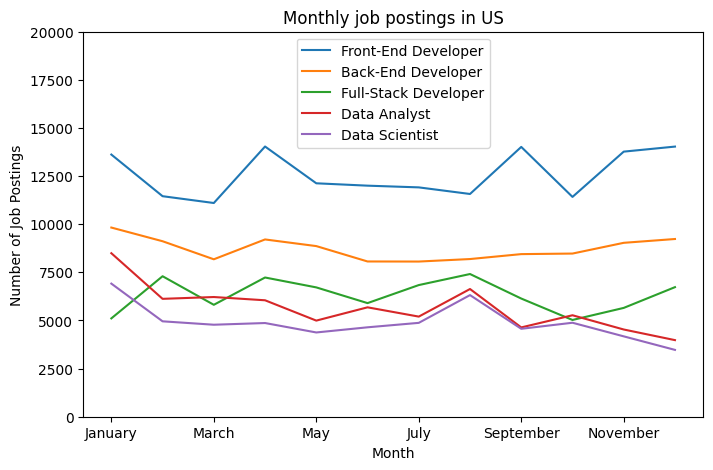

In [28]:
df_us_merged = df_us_merged[top_5_jobs] # filter the dataframe to only keep the top 5 jobs
df_us_merged.plot(kind='line', figsize=(8,5), title='Monthly job postings in US', xlabel='Month', ylabel='Number of Job Postings', ylim=(0, 20000))

# Exercises

### Merge US Jobs and Monthly Postings (2.7.1) 

In [64]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%B') # create a new column with the month of the job posting
df_us_jobs = df[df['job_country'] == 'United States'] # filter the dataframe to only keep the US jobs
df_monthly_postings = df_us_jobs.groupby(['job_posted_month']).size().reset_index(name = 'postings_count')# group the dataframe by month and job title and count the number of postings
merged_df = df_us_jobs.merge(df_monthly_postings,  on='job_posted_month', how='right') # merge the 2 dataframes to get the number of postings per month and job title
merged_df.head()
# it starts from april because the format of the month is the string of the month (alphabetical order) and not the number of the month (numerical order)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,postings_count
0,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April,17282
1,Data Scientist,"Data Scientist, Data Strategy and Analytics","Alameda, CA",via Trabajo.org,Full-time,False,"California, United States",2023-04-26 13:05:10,False,False,United States,None,NaN,NaN,Abbott,None,None,April,17282
2,Senior Data Scientist,"Mission Data Scientist, Senior - Security Clea...","Fayetteville, NC",via My Panhandle Jobs,Full-time,False,Georgia,2023-04-09 14:21:49,False,True,United States,None,NaN,NaN,Booz Allen Hamilton,"['python', 'r', 'postgresql', 'pandas', 'table...","{'analyst_tools': ['tableau', 'splunk'], 'data...",April,17282
3,Data Engineer,Data Engineer,"Las Vegas, NV",via Trabajo.org,Full-time,False,"Illinois, United States",2023-04-28 13:09:58,True,False,United States,None,NaN,NaN,Indotronix International Corporation,"['python', 'shell', 'azure', 'databricks', 'ai...","{'cloud': ['azure', 'databricks'], 'libraries'...",April,17282
4,Data Analyst,HR Data Analyst - Remote,Anywhere,via ZipRecruiter,Full-time,True,"California, United States",2023-04-24 13:00:47,False,False,United States,None,NaN,NaN,Workoo Technologies,"['sas', 'sas', 'sql']","{'analyst_tools': ['sas'], 'programming': ['sa...",April,17282


In [62]:
df['job_posted_month'] = df['job_posted_date'].dt.to_period('M')
df_us_jobs = df[df['job_country'] == 'United States']
df_monthly_postings = df_us_jobs.groupby('job_posted_month').size().reset_index(name='postings_count')
merged_df = pd.merge(df_us_jobs, df_monthly_postings, on='job_posted_month', how='right')
merged_df.head()
#in this was it starts from January (month order) and not from April (alphabetical order)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,postings_count
0,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",2023-01,22670
1,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",2023-01,22670
2,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",2023-01,22670
3,Data Engineer,Data Engineer,"Cincinnati, OH",via SimplyHired,Full-time,False,"Texas, United States",2023-01-22 13:08:53,False,False,United States,None,NaN,NaN,Divisions Maintenance Group,"['sql', 'nosql', 'python', 'java', 'c++', 'sca...","{'databases': ['cassandra'], 'libraries': ['ha...",2023-01,22670
4,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"['sql', 'python', 'unix', 'excel', 'jira']","{'analyst_tools': ['excel'], 'async': ['jira']...",2023-01,22670


### Merge Non-Remote Jobs and Salary (2.7.2)


Create a DataFrame df_not_remote_jobs that contains only job postings that do not offer remote work (job_work_from_home == False).

From df_not_remote_jobs, calculate the average yearly salary (salary_year_avg) for each job title (job_title_short).
Store the result in a new DataFrame df_not_remote_salary.
Rename the salary column to salary_not_remote_avg.

Merge df_not_remote_jobs and df_not_remote_salary on the job_title_short column using a right join.

Display the first 5 rows of the resulting DataFrame.


In [72]:
df_not_remote_jobs = df[df['job_work_from_home'] == False] # filter the dataframe to only keep the non remote jobs
df_not_remote_salary = df_not_remote_jobs.groupby('job_title_short')['salary_year_avg'].mean() # group the dataframe by job title and calculate the average salary
merged_df = df_not_remote_jobs.merge(df_not_remote_salary, on='job_title_short', how='right') # merge the 2 dataframes to get the average salary per job title
merged_df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg_x,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,salary_year_avg_y
0,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow...",June,90177.41994
1,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",January,90177.41994
2,Business Analyst,BI Engineer,Namibia,via Intellijobs.ai,Full-time,False,Namibia,2023-03-05 14:10:49,False,False,Namibia,None,NaN,NaN,Innover,"['sql', 'gcp', 'looker', 'tableau']","{'analyst_tools': ['looker', 'tableau'], 'clou...",March,90177.41994
3,Business Analyst,Business Analyst,"Tel Aviv-Yafo, Israel",via Comeet,Full-time,False,Israel,2023-09-05 13:50:12,False,False,Israel,None,NaN,NaN,ironSource,"['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",September,90177.41994
4,Business Analyst,Commercial Analyst,South Africa,via LinkedIn,Full-time,False,South Africa,2023-02-14 13:36:23,True,False,South Africa,None,NaN,NaN,PEP,"['sql', 'tableau', 'spss', 'sap']","{'analyst_tools': ['tableau', 'spss', 'sap'], ...",February,90177.41994


### Merge Company Salary and Remote Count (2.7.3) - Problem

- Create a DataFrame df_company_salary that calculates the average yearly salary for each company.
- Then, create another DataFrame df_company_remote that counts the number of remote job postings for each company. Name this count column remote_count.
- Merge these two DataFrames on the company_name column using an inner join and display the first 5 rows of the resulting DataFrame.


In [6]:
df_company_salary = df.groupby('company_name')['salary_year_avg'].mean().reset_index() # group the dataframe by company name and calculate the average salary
df_company_remote = df[df['job_work_from_home'] == True]
df_company_remote = df_company_remote.groupby('company_name').size().reset_index(name= 'remote_jobs') # group the dataframe by company name and calculate the average salary for remote jobs
merged_df = pd.merge(df_company_salary, df_company_remote, on='company_name', how='inner') # merge the 2 dataframes to get the average salary per company name
merged_df.head()

,company_name,salary_year_avg,remote_jobs
0,#EqualsTrue,NaN,4
1,#TeamGoHealth,NaN,1
2,#twiceasnice Recruiting,77750.0,1
3,&Work,NaN,1
4,"(AEG) Application Engineering Group, Inc.",NaN,1
